***
# EDA demographics
***

In [1]:
import pandas as pd
import numpy as np
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from warnings import filterwarnings
pd.options.display.max_columns = 500

In [10]:
import seaborn as sns
import missingno as msgo

In [6]:
df = pd.read_csv("../Dataset/demographics.csv")

In [7]:
df.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,1798,1654,1937,2203,2027,1785,1619,5026,40,39.8,9587,836,348,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,1487,1814,2073,2274,2246,1961,1869,3940,41,8.4,9885,467,253,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,1726,1828,1914,1892,1910,1945,1763,2690,39,21.8,8960,304,256,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,9252,6843,5633,4944,4599,4018,3373,8946,34,87.3,34310,2772,1782,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,1296,1336,1451,1557,1659,1560,1326,3176,43,25.5,7122,270,349,445,632,690,1417,1060,1237,589,433,70772,84402


## Descriptivos

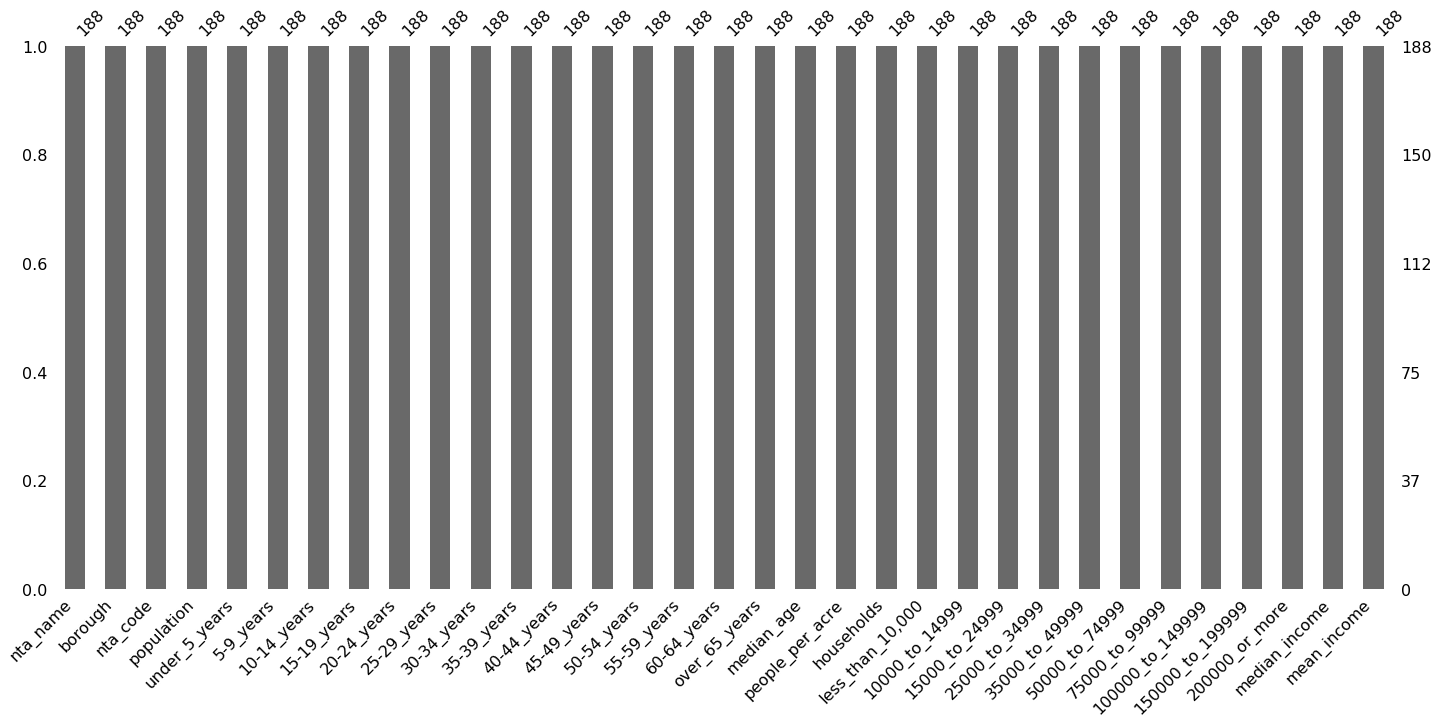

In [11]:
msgo.bar(df)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,188.0,43397.175532,21288.062949,13354.0,27237.00,37897.00,54244.750,132378.0
under_5_years,188.0,2752.127660,1695.809470,506.0,1490.50,2386.00,3579.250,14703.0
5-9_years,188.0,2515.478723,1496.808314,408.0,1443.50,2228.50,3242.750,11971.0
10-14_years,188.0,2489.159574,1459.440306,326.0,1437.75,2197.50,3263.750,10024.0
15-19_years,188.0,2842.632979,1574.371410,449.0,1619.00,2568.00,3717.250,9094.0
20-24_years,188.0,3404.617021,1886.482082,798.0,1929.50,2956.00,4527.000,10046.0
25-29_years,188.0,3872.106383,2462.683806,736.0,2089.25,3081.50,5252.750,11971.0
30-34_years,188.0,3512.468085,2113.358863,742.0,1928.00,2893.00,4611.000,11292.0
35-39_years,188.0,3116.265957,1704.685137,689.0,1835.75,2555.50,4034.500,10406.0
40-44_years,188.0,3007.898936,1531.520696,743.0,1867.50,2520.00,3778.500,10004.0


 Distribuciones por familias de variables 

In [16]:
population_age = ['population', 'under_5_years',
       '5-9_years', '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years',
       'median_age', 'people_per_acre', 'households']
population_incomes =[ 'less_than_10,000',
       '10000_to_14999', '15000_to_24999', '25000_to_34999', '35000_to_49999',
       '50000_to_74999', '75000_to_99999', '100000_to_149999',
       '150000_to_199999', '200000_or_more', 'median_income', 'mean_income']

### Population ages